# Pymaceuticals Inc.
---

### Analysis

- This analysis explores the correlation between the Tumor Volumes and the Drug Regimens

## Conclusions

- The correlation between the mice's weight and the volume of the tumors was high, at a 0.84 value.
- I would launch a study to explore the avergae weight of tumors of a similar volume seen here to see if this was a direct cause, or if it is a sympton of the disease/cure
 

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from sklearn.linear_model import LinearRegression

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_metadata.head()
study_results.head()
 
 
# Display the data table for preview
df= pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
df.head()



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [10]:
# Checking the number of mice.

print("Number of mice: ",len(df['Mouse ID'].unique()))


Number of mice:  249


In [19]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

MiceID_Count=len(df["Mouse ID"])
print("Mice ID Count =",MiceID_Count)

timepoint_count=len(df["Timepoint"])
print("Timepoint =",timepoint_count)

duplicate_count=df[df.duplicated(subset=['Mouse ID','Timepoint'])]['Mouse ID'].unique()
print("Number of Duplicate Mice =", duplicate_count)



Mice ID Count = 1893
Timepoint = 1893
Number of Duplicate Mice = ['g989']


In [21]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice=df.loc[df['Mouse ID']==duplicate_count[0]]
duplicate_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [22]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df=df.set_index('Mouse ID')
df=df.drop([duplicate_count[0]])
df=df.reset_index()
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [23]:
# Checking the number of mice in the clean DataFrame.
print("Number of mice: ",len(df['Mouse ID'].unique()))

Number of mice:  248


## Summary Statistics

In [60]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

df0=df.copy()
df2=df0.groupby('Drug Regimen')
Mean_TumorV=df2['Tumor Volume (mm3)'].mean()
Median_TumorV=df2['Tumor Volume (mm3)'].median()
Var_TumorV=df2['Tumor Volume (mm3)'].var()
Std_TumorV=df2['Tumor Volume (mm3)'].std()
Sem_TumorV=df2['Tumor Volume (mm3)'].sem()

drug_df=pd.DataFrame({'Mean Tumor Volume':Mean_TumorV,
                      'Median Tumor Volume':Median_TumorV,
                      'Tumor Volume Variance':Var_TumorV,
                      'Tumor Volume Std. Dev.':Std_TumorV,
                      'Tumor Volume Std. Err.':Sem_TumorV})

drug_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [34]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
drug_df2=df2["Tumor Volume (mm3)"].agg(['mean','median','var','std','sem'])
drug_df2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<Axes: xlabel='Drug Regimen'>

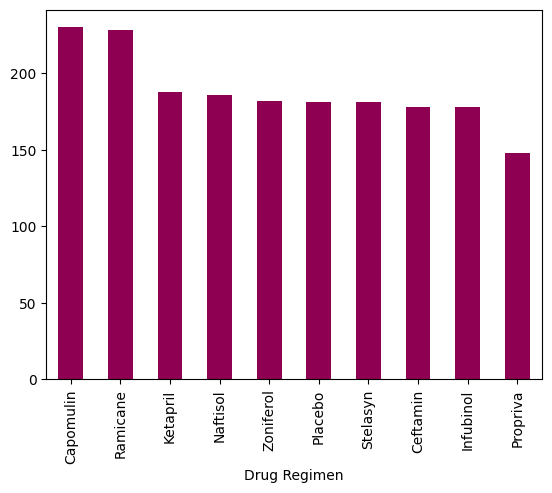

In [45]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
df3=df2.describe()['Timepoint']['count'].sort_values(ascending=False)
df3.plot.bar(y='Count of Observed Mouse Timepoints', colormap='PiYG')


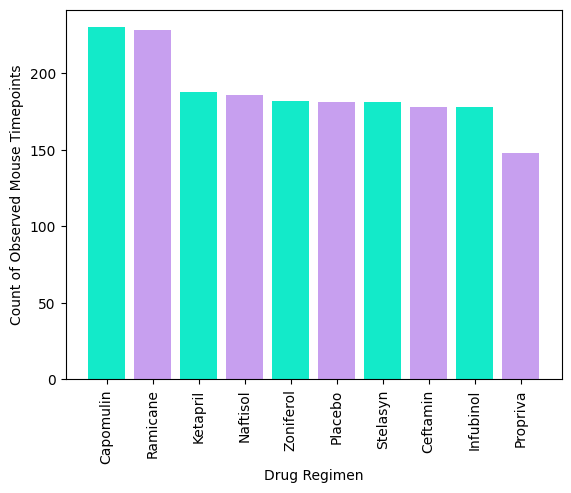

In [57]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
df4=df2.describe()['Timepoint']['count'].sort_values(ascending=False)

plt.xticks(rotation=90)
plt.ylabel('Count of Observed Mouse Timepoints')
plt.xlabel('Drug Regimen')
bar_plot=plt.bar(df4.reset_index()['Drug Regimen'], df4, color=('#13EAC9', '#C79FEF'))

<Axes: ylabel='Sex'>

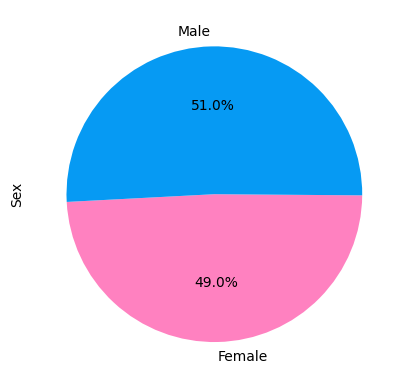

In [62]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
df5=df0.groupby('Gender')
mouse_gender=df5['Gender'].count()
mouse_gender.plot.pie(autopct='%1.1f%%',startangle=183,colors = ['#FF81C0', '#069AF3'])

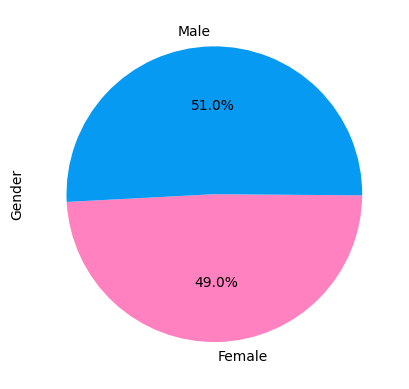

In [63]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.ylabel('Gender')
mouse_genderP=plt.pie(mouse_gender,autopct='%1.1f%%',startangle=183,colors = ['#FF81C0', '#069AF3'],labels=('Female','Male'))

## Quartiles, Outliers and Boxplots

In [66]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
df6=df0.groupby('Mouse ID')
df7=df0

mouse_max_timepoint=df6['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

df7=pd.merge(df7,mouse_max_timepoint,how='right',on=['Mouse ID','Timepoint'])
df7.head(20)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
5,a401,45,66.794156,4,Zoniferol,Female,8,25
6,a411,45,38.407618,1,Ramicane,Male,3,22
7,a444,45,43.047543,0,Ramicane,Female,10,25
8,a457,10,49.783419,0,Ketapril,Female,11,30
9,a492,45,60.122011,1,Stelasyn,Male,20,25


In [67]:
# Put treatments into a list for for loop (and later for plot labels)
treatment=['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes

def outliers(treatment):
    t_data=df7.loc[(df7['Drug Regimen']==treatment)]['Tumor Volume (mm3)']
    treatment_quartiles=t_data.quantile([.25,.5,.75])
    #Determine quartiles
    tf_quartile=treatment_quartiles[.25]
    ts_quartile=treatment_quartiles[.5]
    tt_quartile=treatment_quartiles[.75]
    #Calculate IQR
    Iqr=tt_quartile-tf_quartile
    #Calculate boundaries
    treatment_lower=tf_quartile-(1.5*Iqr)
    treatment_upper=tt_quartile+(1.5*Iqr)

    # Determine outliers using upper and lower bounds
    t_outliers=t_data.loc[(t_data<treatment_lower)|(t_data>treatment_upper)]
    print(t_outliers)
    return(t_data)

Capomulins_outlier=outliers(treatment[0])
Ramicane_outlier=outliers(treatment[1])
Infubinol_outlier=outliers(treatment[2])
Ceftamin_outlier=outliers(treatment[3])

tumor_volume_data=[Capomulins_outlier,Ramicane_outlier,Infubinol_outlier,Ceftamin_outlier]


Series([], Name: Tumor Volume (mm3), dtype: float64)
Series([], Name: Tumor Volume (mm3), dtype: float64)
31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Series([], Name: Tumor Volume (mm3), dtype: float64)


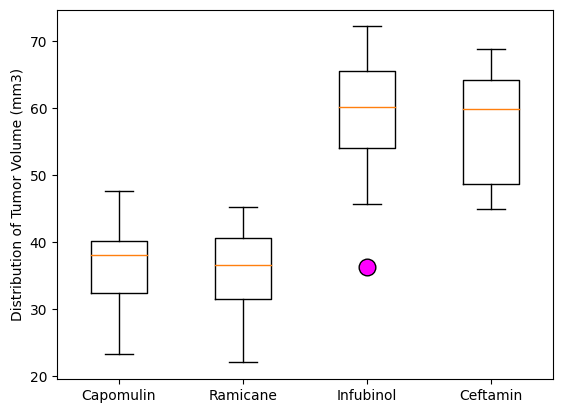

In [71]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_volume_data,labels=treatment,flierprops=dict(markerfacecolor='magenta',markersize='12'))
plt.ylabel('Distribution of Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

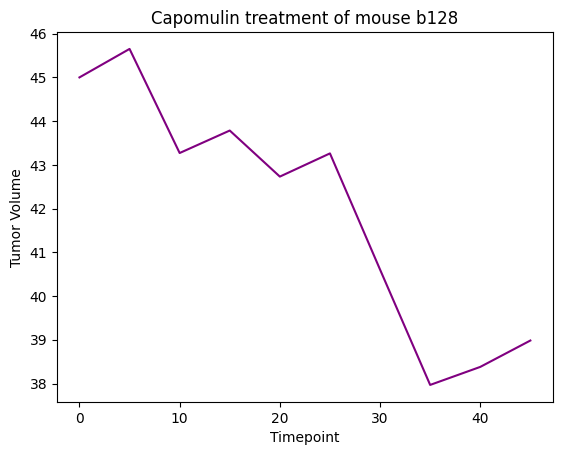

In [75]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
df8=df0
mouse_id='b128'
mouse_data=df8.loc[df8['Mouse ID']==mouse_id]
plt.plot(mouse_data['Timepoint'],mouse_data['Tumor Volume (mm3)'], color=('#800080'))
plt.title('Capomulin treatment of mouse b128')
plt.ylabel('Tumor Volume')
plt.xlabel('Timepoint')
plt.show()

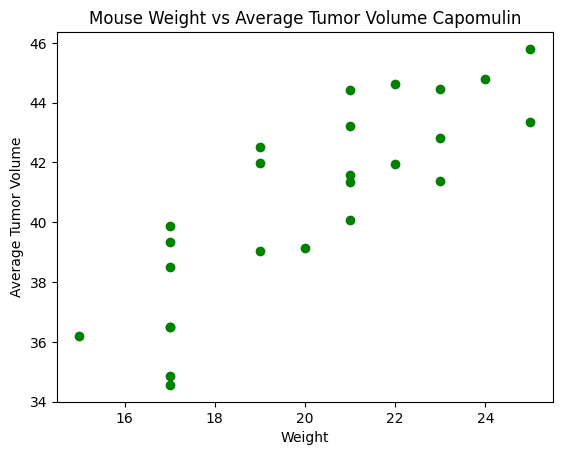

In [83]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
df9=df0
mouse_weight=df9.loc[df9['Drug Regimen']=='Capomulin']
mouse_weight=mouse_weight.groupby('Mouse ID')[['Weight (g)','Tumor Volume (mm3)']]
mouse_weight=mouse_weight.mean()
mouse_weight2=mouse_weight.reset_index()
plt.scatter(mouse_weight2['Weight (g)'],mouse_weight2['Tumor Volume (mm3)'], color=('#008000'))
plt.title('Mouse Weight vs Average Tumor Volume Capomulin')
plt.ylabel('Average Tumor Volume')
plt.xlabel('Weight')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


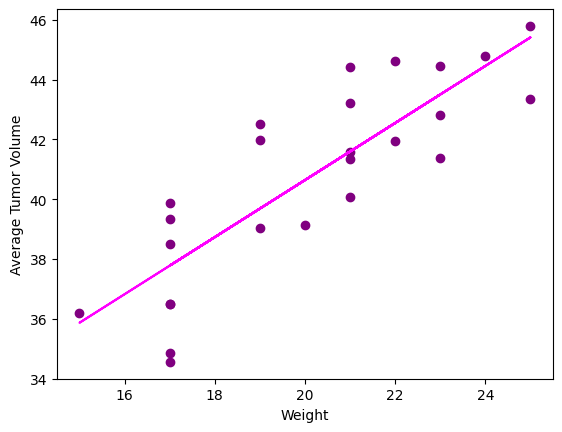

In [91]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
mouse_weight_vs_tumorvolume=round(st.pearsonr(mouse_weight2['Weight (g)'],mouse_weight2['Tumor Volume (mm3)'])[0],2)
print('The correlation between mouse weight and the average tumor volume is',mouse_weight_vs_tumorvolume)

mouse_weight3=mouse_weight2['Weight (g)'].values.reshape(-1, 1)
mouse_tumor3= mouse_weight2['Tumor Volume (mm3)'].values.reshape(-1, 1)
linear_regression = LinearRegression()
linear_regression.fit(mouse_weight3, mouse_tumor3)
linear_regression_prediction = linear_regression.predict(mouse_weight3)


plt.scatter(mouse_weight3,mouse_tumor3, color='purple')
plt.plot(mouse_weight3, linear_regression_prediction, color='magenta')
plt.ylabel('Average Tumor Volume')
plt.xlabel('Weight')
plt.show()